# Forecasting Bitcoin Prices Using Prophet

## Background

You are working as financial advisor. Your most important client asked you to invest 10% of their monthly benefits in Bitcoin.

You decided to analyze patterns in hourly Bitcoin prices, since you belive that building a model which can forecast prices into the future will give you an idea if investing in Bitcoin is worth or not.

## Instructions

Load the starter notebook into Google Colab and complete the following steps:

1. Execute the code cells under the "Notebook Set Up" section.

2. Read in the `bitcoin_hourly` CSV file. Drop the `volume` column.

3. Label the columns `ds` and `y` so that the syntax is recognized by Prophet.

4. View dataframe shape, and the first and last five rows of the  DataFrame.

5. Sort the DataFrame by `ds` in ascending order, so as to arrange the data chronologically from past to present. With that done, visually inspect the price data using `hvplot`.

6. Call the `Prophet` function, and store it as an object.

7. `Fit` the time-series model.

8. Create a `future_trends` dataframe to hold predictions, using the `make_future_dataframe` function. (Make the prediction go out as far as 1,000 hours).

9. Make the predictions for the trend data using the `future_trends` DataFrame, and preview the first five rows of the DataFrame.

10. Plot the Prophet predictions for the `forecast_trends` data.

11. Use the `plot_components` function to visualize the forecast results.

12. Set the `datetime` index of the `forecast_trends` data, using the `ds` column.

13. From the `forecast_trends` DataFrame, use `hvPlot` to visualize the `yhat`, `yhat_lower`, and `yhat_upper` columns over the last 10 days (i.e., the last 240 rows).

14. Create a `forecast_march_2021` Dataframe, which contains just forecasts for that month. The DataFrame should include the columns `yhat_upper`, `yhat_lower`, and `yhat`. Replace the column names to something less technical sounding: `Best Case`, `Worst Case`, and `Most Likely Case`, respectively.

15. Display the average forecasted price for March 2021

    **Hint:** You can use the [Pandas `mean` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html).



## Step 1: Notebook Set Up

In [49]:
# Install the required libraries
#!pip install prophet

In [50]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
import datetime as dt
import holoviews as hv
from prophet import Prophet
from pathlib import Path

%matplotlib inline

## Step 2: Read in the `bitcoin_hourly` CSV file. Drop the `volume` column

In [51]:
# Upload the bitcoin_hourly.csv file
data_path = ("../Resources/bitcoin_hourly.csv")

In [52]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv(data_path,
                 index_col="date",
                 infer_datetime_format=True,
                 parse_dates=True
                )

# Drop columns that won't be used
df = df.drop("volume", axis=1)

# Preview the dataset
df.head()

,close
date,
2017-08-17 05:00:00,4315.32
2017-08-17 06:00:00,4324.35
2017-08-17 07:00:00,4349.99
2017-08-17 08:00:00,4360.69
2017-08-17 09:00:00,4444.00


In [53]:
# Set `bokeh` to render hvPlot charts
#hv.extension("bokeh")

# Use hvPlot to visually inspect the price data
df["close"].hvplot()

:Curve   [date]   (close)

## Step 3: Label the columns `ds` and `y` so that the syntax is recognized by Prophet

In [54]:
# Reset the index so that we recode the columns for Prophet
df = df.reset_index()
df

,date,close
0,2017-08-17 05:00:00,4315.32
1,2017-08-17 06:00:00,4324.35
2,2017-08-17 07:00:00,4349.99
3,2017-08-17 08:00:00,4360.69
4,2017-08-17 09:00:00,4444.00
...,...,...
30743,2021-02-12 01:00:00,48477.50
30744,2021-02-12 02:00:00,47935.66
30745,2021-02-12 03:00:00,47587.31
30746,2021-02-12 04:00:00,47271.55


In [55]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df =df.rename(columns={"date":"ds", "close":"y"})
df.head()

,ds,y
0,2017-08-17 05:00:00,4315.32
1,2017-08-17 06:00:00,4324.35
2,2017-08-17 07:00:00,4349.99
3,2017-08-17 08:00:00,4360.69
4,2017-08-17 09:00:00,4444.00


## Step 4:  View dataframe shape, and the first and last five rows of the  DataFrame

In [56]:
# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
# YOUR CODE HERE

## Step 5:  Sort the DataFrame by `ds` in ascending order, so as to arrange the data chronologically from past to present. With that done, visually inspect the price data using `hvplot`

In [91]:
# Sort the DataFrame by `ds` in ascending order
df = df.sort_values(by=['ds'], ascending=True)

# Display sample data from head and tail
df

,ds,y
0,2017-08-17 05:00:00,4315.32
1,2017-08-17 06:00:00,4324.35
2,2017-08-17 07:00:00,4349.99
3,2017-08-17 08:00:00,4360.69
4,2017-08-17 09:00:00,4444.00
...,...,...
30743,2021-02-12 01:00:00,48477.50
30744,2021-02-12 02:00:00,47935.66
30745,2021-02-12 03:00:00,47587.31
30746,2021-02-12 04:00:00,47271.55


In [58]:
# Set `bokeh` to render hvPlot charts
#hv.extension("bokeh")

# Diplay the data using hvPlot
df.hvplot()

:Curve   [index]   (y)

## Step 6: Call the `Prophet` function, and store it as an object

In [59]:
# Call the Prophet function, store as an object
m = Prophet()
m

In [60]:
# Fit the Prophet model.
m.fit(df)

22:01:15 - cmdstanpy - INFO - Chain [1] start processing
22:01:37 - cmdstanpy - INFO - Chain [1] done processing


## Step 8: Create a `future_trends` dataframe to hold predictions, using the `make_future_dataframe` function. (Make the prediction go out as far as 1,000 hours)

In [61]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days)
future_trends = m.make_future_dataframe(periods=1000, freq='H')

# View the last five rows of the predictions
future_trends.tail()

,ds
31482,2021-03-25 17:00:00
31483,2021-03-25 18:00:00
31484,2021-03-25 19:00:00
31485,2021-03-25 20:00:00
31486,2021-03-25 21:00:00


## Step 9: Make the predictions for the trend data using the `future_trends` DataFrame, and preview the first five rows of the DataFrame

In [62]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = m.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-17 05:00:00,5771.779628,2856.832516,5555.431563,5771.779628,5771.779628,-1486.874791,-1486.874791,-1486.874791,-6.114948,...,10.405574,10.405574,10.405574,-1491.165416,-1491.165416,-1491.165416,0.0,0.0,0.0,4284.904837
1,2017-08-17 06:00:00,5778.684218,3010.387057,5553.936049,5778.684218,5778.684218,-1490.644914,-1490.644914,-1490.644914,-4.093493,...,11.175370,11.175370,11.175370,-1497.726791,-1497.726791,-1497.726791,0.0,0.0,0.0,4288.039304
2,2017-08-17 07:00:00,5785.588808,3006.179335,5579.503739,5785.588808,5785.588808,-1494.990549,-1494.990549,-1494.990549,-2.481317,...,11.787697,11.787697,11.787697,-1504.296929,-1504.296929,-1504.296929,0.0,0.0,0.0,4290.598259
3,2017-08-17 08:00:00,5792.493398,2999.133502,5534.339559,5792.493398,5792.493398,-1502.011760,-1502.011760,-1502.011760,-3.369356,...,12.233381,12.233381,12.233381,-1510.875785,-1510.875785,-1510.875785,0.0,0.0,0.0,4290.481638
4,2017-08-17 09:00:00,5799.397988,2846.280327,5495.056208,5799.397988,5799.397988,-1511.237985,-1511.237985,-1511.237985,-6.280252,...,12.505582,12.505582,12.505582,-1517.463315,-1517.463315,-1517.463315,0.0,0.0,0.0,4288.160003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31482,2021-03-25 17:00:00,45540.677374,50557.302475,56569.679645,42833.541895,48284.197769,7996.125367,7996.125367,7996.125367,-5.486029,...,8.440868,8.440868,8.440868,7993.170529,7993.170529,7993.170529,0.0,0.0,0.0,53536.802741
31483,2021-03-25 18:00:00,45546.844279,50508.112825,56408.588769,42836.046332,48293.208723,7999.783586,7999.783586,7999.783586,-3.616155,...,7.255592,7.255592,7.255592,7996.144149,7996.144149,7996.144149,0.0,0.0,0.0,53546.627864
31484,2021-03-25 19:00:00,45553.011183,50743.111243,56397.991853,42838.550768,48302.219677,8004.995856,8004.995856,8004.995856,-0.096978,...,5.963910,5.963910,5.963910,7999.128924,7999.128924,7999.128924,0.0,0.0,0.0,53558.007039
31485,2021-03-25 20:00:00,45559.178087,50810.485044,56431.464739,42841.055205,48311.230630,8010.871782,8010.871782,8010.871782,4.162529,...,4.584445,4.584445,4.584445,8002.124809,8002.124809,8002.124809,0.0,0.0,0.0,53570.049870


## Step 10: Plot the Prophet predictions for the `forecast_trends` data

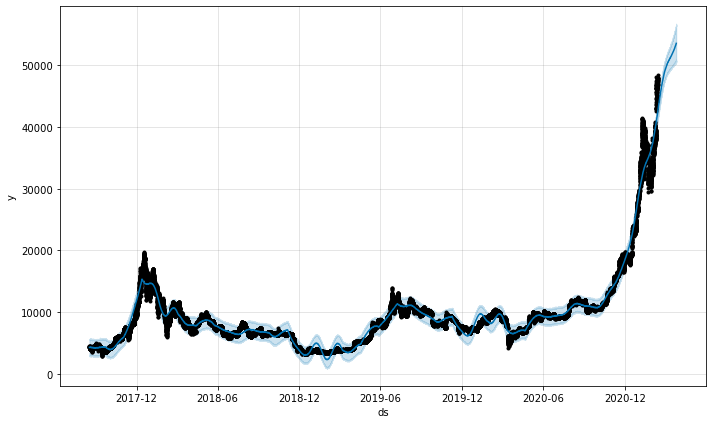

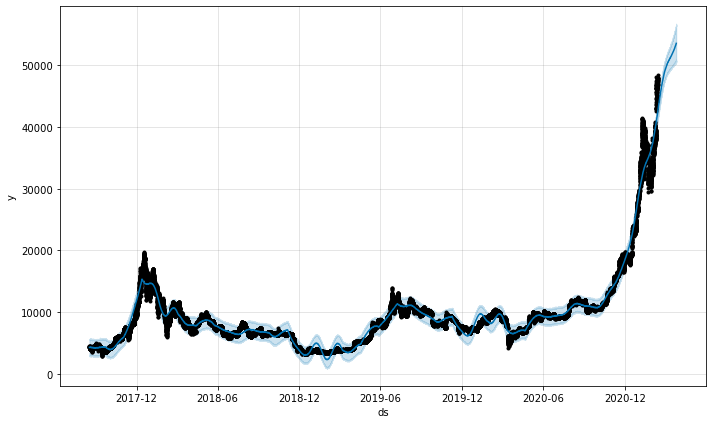

In [63]:
# Plot the Prophet predictions for the Mercado trends data
m.plot(forecast_trends)

## Step 11: Use the `plot_components` function to visualize the forecast results

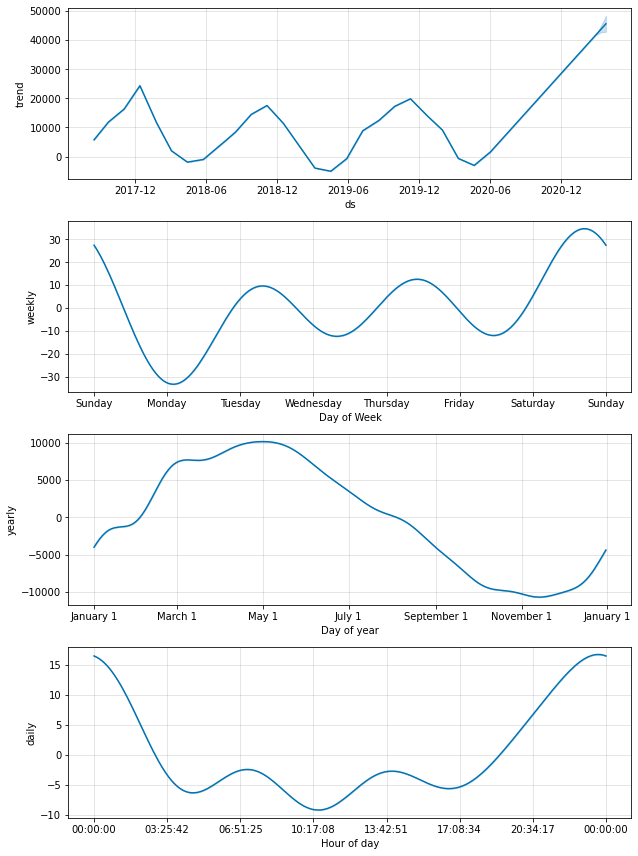

In [64]:
# Use the plot_components function to visualize the forecast results 
figures = m.plot_components(forecast_trends)

## Step 12: Set the `datetime` index of the `forecast_trends` data, using the `ds` column

In [65]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends = forecast_trends.set_index('ds')# YOUR CODE HERE
forecast_trends.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2017-08-17 05:00:00,5771.779628,2856.832516,5555.431563,5771.779628,5771.779628,-1486.874791,-1486.874791,-1486.874791,-6.114948,-6.114948,...,10.405574,10.405574,10.405574,-1491.165416,-1491.165416,-1491.165416,0.0,0.0,0.0,4284.904837
2017-08-17 06:00:00,5778.684218,3010.387057,5553.936049,5778.684218,5778.684218,-1490.644914,-1490.644914,-1490.644914,-4.093493,-4.093493,...,11.175370,11.175370,11.175370,-1497.726791,-1497.726791,-1497.726791,0.0,0.0,0.0,4288.039304
2017-08-17 07:00:00,5785.588808,3006.179335,5579.503739,5785.588808,5785.588808,-1494.990549,-1494.990549,-1494.990549,-2.481317,-2.481317,...,11.787697,11.787697,11.787697,-1504.296929,-1504.296929,-1504.296929,0.0,0.0,0.0,4290.598259
2017-08-17 08:00:00,5792.493398,2999.133502,5534.339559,5792.493398,5792.493398,-1502.011760,-1502.011760,-1502.011760,-3.369356,-3.369356,...,12.233381,12.233381,12.233381,-1510.875785,-1510.875785,-1510.875785,0.0,0.0,0.0,4290.481638
2017-08-17 09:00:00,5799.397988,2846.280327,5495.056208,5799.397988,5799.397988,-1511.237985,-1511.237985,-1511.237985,-6.280252,-6.280252,...,12.505582,12.505582,12.505582,-1517.463315,-1517.463315,-1517.463315,0.0,0.0,0.0,4288.160003


## Step 13: From the `forecast_trends` DataFrame, use `hvPlot` to visualize the `yhat`, `yhat_lower`, and `yhat_upper` columns over the last 10 days (i.e., the last 240 rows)

* `yhat` represents the most likely (average) forecast.

* `yhat_lower` and `yhat_upper` represents the worst and best case prediction.

    * These are based on what are known as 80% confidence intervals.

In [66]:
# From the `forecast_trends` DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 10 days (24*10 = 240) 
forecast_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-240:,:].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

## Step 14: Create a `forecast_march_2021` Dataframe, which contains just forecasts for that month. The DataFrame should include the columns `yhat_upper`, `yhat_lower`, and `yhat`. Replace the column names to something less technical sounding: `Best Case`, `Worst Case`, and `Most Likely Case`, respectively

In [67]:
# Create a `forecast_march_2021` Dataframe, which contains just forecasts for that month
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
forecast_march_2021 = forecast_trends[['yhat', 'yhat_lower', 'yhat_upper']].loc['2021-03-01':'2021-03-31']

# Replace the column names to something less technical sounding
forecast_march_2021 = forecast_march_2021.rename(columns={"yhat_upper":"Best Case", "yhat":"Most Likely Case", "yhat_lower":"Worst Case"})

forecast_march_2021.head()

,Most Likely Case,Worst Case,Best Case
ds,,,
2021-03-01 00:00:00,49272.944857,47857.381888,50809.427062
2021-03-01 01:00:00,49279.386373,47846.010631,50763.764502
2021-03-01 02:00:00,49282.817697,47769.931133,50781.378807
2021-03-01 03:00:00,49285.934746,47788.091271,50825.632359
2021-03-01 04:00:00,49291.928804,47837.409372,50811.774025


## Step 15: Display the average forecasted price for March 2021

In [68]:
# Display the average forecasted price for March 2021
march_average = forecast_march_2021.mean()
march_average


Most Likely Case    51421.422540
Worst Case          49437.964675
Best Case           53479.032324
dtype: float64

## Matt's Prophet Forecasting  Challenge

In [102]:
# Extend the existing bitcoin hourly database to the current date
# Upload the bitcoin_hourly.csv file
data_path = ("../Resources/Bitfinex_BTCUSD_1h.csv")
df_new = pd.read_csv(data_path,
                 index_col="date",
                 infer_datetime_format=True,
                 parse_dates=True
                )

# Drop columns that won't be used
df_new = df_new.drop(['unix', 'symbol', 'open', 'high', 'low', 'Volume USD', 'Volume BTC'], axis=1)

# Selecting required period and sorting
df_new = df_new.loc['2021-02-12 06:00:00':'2022-10-20 00:00:00']
df_new = df_new.sort_index()

# Reset the index so that we recode the columns for Prophet
df_new = df_new.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
df_new =df_new.rename(columns={"date":"ds", "close":"y"})

# Preview the dataset
df_new

,ds,y
0,2021-02-12 06:00:00,47366.000000
1,2021-02-12 07:00:00,47319.000000
2,2021-02-12 08:00:00,47159.000000
3,2021-02-12 09:00:00,47377.851125
4,2021-02-12 10:00:00,47390.000000
...,...,...
14741,2022-10-19 20:00:00,19200.000000
14742,2022-10-19 21:00:00,19208.000000
14743,2022-10-19 22:00:00,19149.000000
14744,2022-10-19 23:00:00,19132.000000


In [92]:
df

,ds,y
0,2017-08-17 05:00:00,4315.32
1,2017-08-17 06:00:00,4324.35
2,2017-08-17 07:00:00,4349.99
3,2017-08-17 08:00:00,4360.69
4,2017-08-17 09:00:00,4444.00
...,...,...
30743,2021-02-12 01:00:00,48477.50
30744,2021-02-12 02:00:00,47935.66
30745,2021-02-12 03:00:00,47587.31
30746,2021-02-12 04:00:00,47271.55


In [104]:
# Combine two DataFrames 
df_update = pd.concat([df, df_new], join='outer')
df_update = df_update.reset_index()
df_update = df_update.drop('index', axis=1)
df_update

,ds,y
0,2017-08-17 05:00:00,4315.32
1,2017-08-17 06:00:00,4324.35
2,2017-08-17 07:00:00,4349.99
3,2017-08-17 08:00:00,4360.69
4,2017-08-17 09:00:00,4444.00
...,...,...
45489,2022-10-19 20:00:00,19200.00
45490,2022-10-19 21:00:00,19208.00
45491,2022-10-19 22:00:00,19149.00
45492,2022-10-19 23:00:00,19132.00


In [105]:
#Call the Prophet function
m2 = Prophet()
m2

In [106]:
# Fit the Prophet model.
m2.fit(df_update)

23:35:52 - cmdstanpy - INFO - Chain [1] start processing
23:36:38 - cmdstanpy - INFO - Chain [1] done processing


In [107]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days)
future_update = m2.make_future_dataframe(periods=1000, freq='H')
future_update.tail()

,ds
46228,2022-11-30 12:00:00
46229,2022-11-30 13:00:00
46230,2022-11-30 14:00:00
46231,2022-11-30 15:00:00
46232,2022-11-30 16:00:00


In [109]:
trends_update = m2.predict(future_update)
trends_update.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
46228,2022-11-30 12:00:00,13263.727297,12158.566400,22824.360853,8663.964354,17011.520344,4524.532625,4524.532625,4524.532625,-1.826896,...,41.800496,41.800496,41.800496,4484.559026,4484.559026,4484.559026,0.0,0.0,0.0,17788.259922
46229,2022-11-30 13:00:00,13259.566971,12467.805419,22805.157546,8655.024304,17027.691363,4527.792227,4527.792227,4527.792227,1.301419,...,44.765015,44.765015,44.765015,4481.725793,4481.725793,4481.725793,0.0,0.0,0.0,17787.359198
46230,2022-11-30 14:00:00,13255.406645,12194.079634,22880.996275,8646.084255,17043.751427,4528.434741,4528.434741,4528.434741,2.013674,...,47.547126,47.547126,47.547126,4478.873941,4478.873941,4478.873941,0.0,0.0,0.0,17783.841386
46231,2022-11-30 15:00:00,13251.246319,12836.586157,22939.741613,8637.144205,17059.811491,4525.725291,4525.725291,4525.725291,-0.386847,...,50.108666,50.108666,50.108666,4476.003471,4476.003471,4476.003471,0.0,0.0,0.0,17776.971610
46232,2022-11-30 16:00:00,13247.085993,12374.675413,22386.780196,8628.204155,17075.871554,4521.403992,4521.403992,4521.403992,-4.123654,...,52.413260,52.413260,52.413260,4473.114386,4473.114386,4473.114386,0.0,0.0,0.0,17768.489985


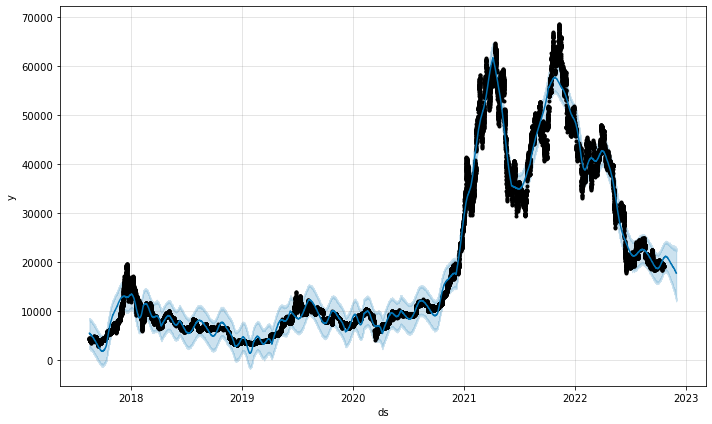

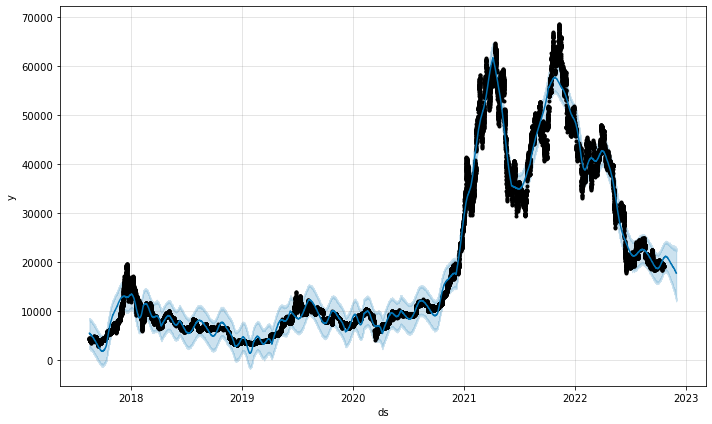

In [110]:
# Plot the Prophet predictions 
m2.plot(trends_update)

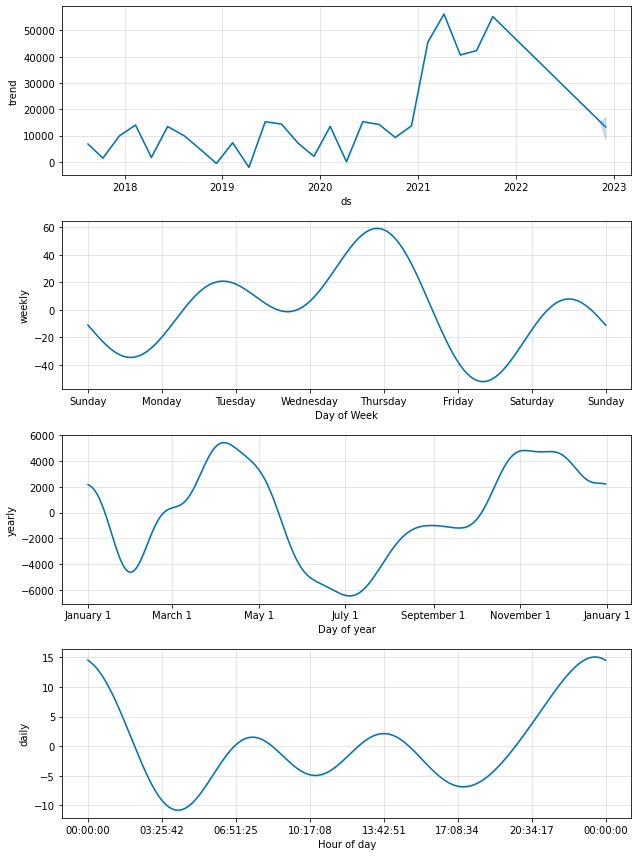

In [111]:
# Use the plot_components function to visualize the forecast
figures_update = m2.plot_components(trends_update)

<AxesSubplot:>

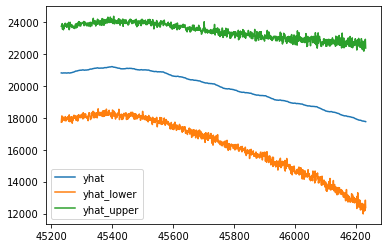

In [113]:
trends_update[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-1000:,:].plot()

# Analysis
Over the next 40 days according to the predictions of Prophet the market of bitcoin looks bearish. Meaning we are expecting falling prices. 
However it may be a good time to buy for a good long-term investment. :o)